<a href="https://colab.research.google.com/github/CarolinaOutoffice/desafio_telecomx_2/blob/main/desafio_telecom_x_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio Telecom X 2


##Parte 1: Carga y preparacion datos


📘 DICCIONARIO DE DATOS

| Campo             | Descripción                                                                 |
|-------------------|------------------------------------------------------------------------------|
| customerID        | Número de identificación único de cada cliente                              |
| Churn             | Si el cliente dejó o no la empresa                                           |
| gender            | Género (masculino o femenino)                                                |
| SeniorCitizen     | Información sobre si un cliente tiene o no una edad igual o mayor a 65 años |
| Partner           | Si el cliente tiene o no una pareja                                          |
| Dependents        | Si el cliente tiene o no dependientes                                        |
| tenure            | Meses de contrato del cliente                                                |
| PhoneService      | Suscripción al servicio telefónico                                           |
| MultipleLines     | Suscripción a más de una línea telefónica                                    |
| InternetService   | Suscripción a un proveedor de internet                                       |
| OnlineSecurity    | Suscripción adicional de seguridad en línea                                  |
| OnlineBackup      | Suscripción adicional de respaldo en línea                                   |
| DeviceProtection  | Suscripción adicional de protección del dispositivo                          |
| TechSupport       | Suscripción adicional de soporte técnico, menor tiempo de espera             |
| StreamingTV       | Suscripción de televisión por cable                                          |
| StreamingMovies   | Suscripción de streaming de películas                                        |
| Contract          | Tipo de contrato                                                             |
| PaperlessBilling  | Si el cliente prefiere recibir la factura en línea                           |
| PaymentMethod     | Forma de pago                                                                |
| Charges.Monthly   | Total de todos los servicios del cliente por mes                             |
| Charges.Total     | Total gastado por el cliente                                                 |


In [1]:
import pandas as pd


In [2]:
# Leer el archivo CSV en un DataFrame de pandas
try:
    df = pd.read_csv('/content/telecomx_data_processed.csv',sep=',')
    print("Archivo leído exitosamente:")
    display(df.head())
except FileNotFoundError:
    print(f"Error: El archivo no se encontró en la ruta especificada: {file_path}")
except Exception as e:
    print(f"Ocurrió un error al leer el archivo: {e}")


Archivo leído exitosamente:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,False,True,True,9,True,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,False,False,False,9,True,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,False,False,False,4,True,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,True,True,False,13,True,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,True,True,False,3,True,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.796667


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   bool   
 4   customer.Partner           7267 non-null   bool   
 5   customer.Dependents        7267 non-null   bool   
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   bool   
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

## Tratamiento de los datos


In [4]:
df_limpio=df.drop(columns=['customerID'])

In [5]:
# Modificación y revision columna churn
df_limpio.loc[df['Churn'].str.strip() == 'NC', 'Churn'] = 'No'
df_limpio['Churn'] = df_limpio['Churn'].replace({'No':0,'Yes':1})
df_limpio['Churn']=df_limpio['Churn'].astype('int')

# Ver cuántos clientes han hecho churn
print(df_limpio["Churn"].value_counts())

# También en porcentaje
print(df_limpio["Churn"].value_counts(normalize=True))


Churn
0    5398
1    1869
Name: count, dtype: int64
Churn
0    0.74281
1    0.25719
Name: proportion, dtype: float64


/tmp/ipython-input-4223662881.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_limpio['Churn'] = df_limpio['Churn'].replace({'No':0,'Yes':1})


In [6]:
df_limpio.columns

Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias'],
      dtype='object')

In [7]:
cols_to_fix_internet = [ 'internet.OnlineSecurity', 'internet.OnlineBackup','internet.DeviceProtection', 'internet.TechSupport','internet.StreamingTV', 'internet.StreamingMovies']

for col in cols_to_fix_internet:
   df_limpio[col]=df_limpio[col].replace('No internet service', 'No')

In [8]:
df_limpio.info()

for col in df_limpio.columns:
  print(col,df_limpio[col].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7267 non-null   int64  
 1   customer.gender            7267 non-null   object 
 2   customer.SeniorCitizen     7267 non-null   bool   
 3   customer.Partner           7267 non-null   bool   
 4   customer.Dependents        7267 non-null   bool   
 5   customer.tenure            7267 non-null   int64  
 6   phone.PhoneService         7267 non-null   bool   
 7   phone.MultipleLines        7267 non-null   object 
 8   internet.InternetService   7267 non-null   object 
 9   internet.OnlineSecurity    7267 non-null   object 
 10  internet.OnlineBackup      7267 non-null   object 
 11  internet.DeviceProtection  7267 non-null   object 
 12  internet.TechSupport       7267 non-null   object 
 13  internet.StreamingTV       7267 non-null   objec

In [9]:
columnas_categoricas=df_limpio.select_dtypes(include=['object']).columns
columnas_categoricas

Index(['customer.gender', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaymentMethod'],
      dtype='object')

In [10]:
df_encoded=pd.get_dummies(df_limpio, columns=columnas_categoricas,drop_first=True)

In [11]:
df_encoded.head()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias,...,internet.OnlineBackup_Yes,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,False,True,True,9,True,True,65.6,593.30,2.186667,...,True,False,True,True,False,True,False,False,False,True
1,0,False,False,False,9,True,False,59.9,542.40,1.996667,...,False,False,False,False,True,False,False,False,False,True
2,1,False,False,False,4,True,True,73.9,280.85,2.463333,...,False,True,False,False,False,False,False,False,True,False
3,1,True,True,False,13,True,True,98.0,1237.85,3.266667,...,True,True,False,True,True,False,False,False,True,False
4,1,True,True,False,3,True,True,83.9,267.40,2.796667,...,False,False,True,True,False,False,False,False,False,True


In [12]:
# Ver cuántos clientes han hecho churn
print(df_limpio["Churn"].value_counts())

# También en porcentaje
print(df_limpio["Churn"].value_counts(normalize=True))


Churn
0    5398
1    1869
Name: count, dtype: int64
Churn
0    0.74281
1    0.25719
Name: proportion, dtype: float64


In [13]:
df_encoded.isnull().sum()

,0
Churn,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
account.PaperlessBilling,0
account.Charges.Monthly,0
account.Charges.Total,0
Cuentas_Diarias,0


## Correlación entre variables

In [14]:
corr=df_encoded.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

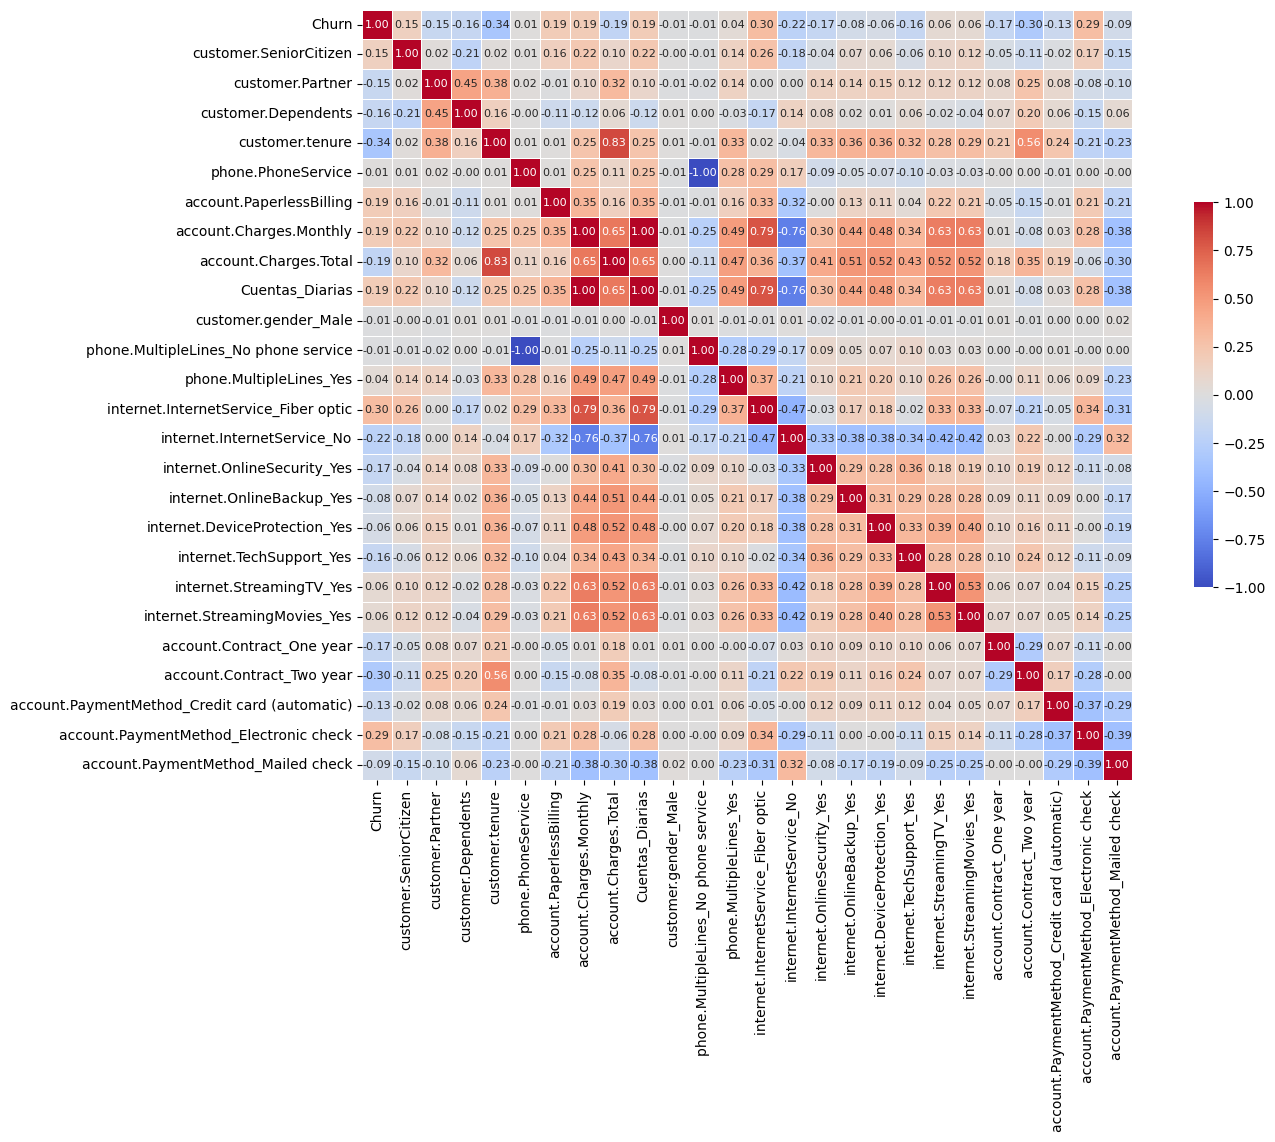

In [15]:
#mapa de correlación con numpy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 10))
ax = sns.heatmap(corr.round(2), vmax=1, vmin=-1, center=0, square= True, linewidths=.5, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 8},
                 cbar_kws={"shrink":.5})
plt.show

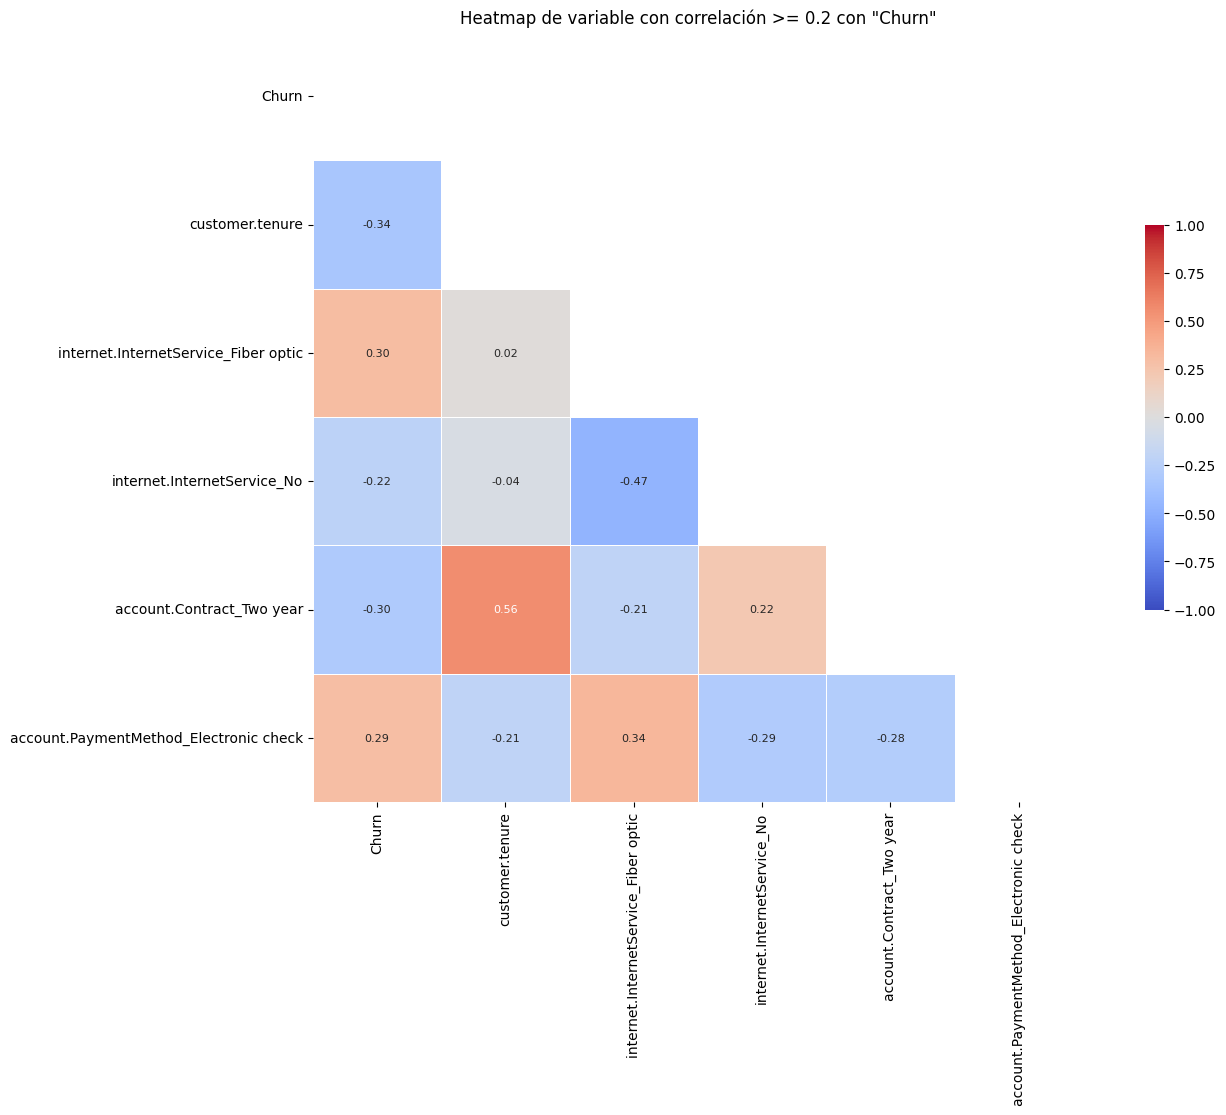

In [16]:
# mascara para mapa de calor

target_var='Churn'

#Definir minimo de correlación absoluta para la selección
limpiar=0.2

#filtrar variables que sean mayor o igual a la correlación absoluta, esto creará una lista con las variables relevantes.
variables_relevantes=corr.index[abs(corr[target_var])>= limpiar].tolist()

if target_var not in variables_relevantes:
  variables_relevantes.append(target_var)

#crear una matriz de correlación solo con las variables relevantes
corr_relevantes=corr.loc[variables_relevantes,variables_relevantes]

# Generar una mascara para esconder o triangulo superior de la matriz
mascara = np.triu(np.ones_like(corr_relevantes, dtype=bool))

#crear mapa de calor
fig, ax = plt.subplots(figsize=(16, 10))
ax = sns.heatmap(corr_relevantes.round(2),
                 vmax=1,
                 vmin=-1,
                 center=0,
                 square= True,
                 linewidths=.5,
                 annot=True,
                 fmt='.2f',
                 cmap='coolwarm',
                 annot_kws={"size": 8},
                 cbar_kws={"shrink":.5},
                 mask=mascara)
plt.title(f'Heatmap de variable con correlación >= {limpiar} con "{target_var}"')
plt.show()


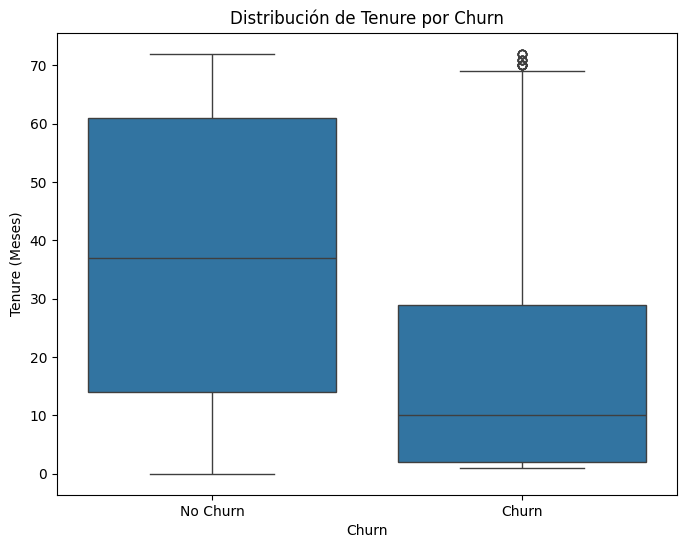

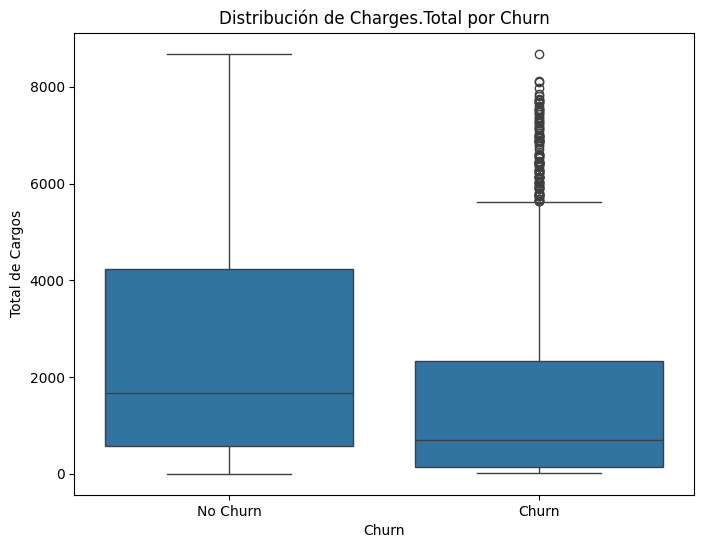

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for customer.tenure vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='customer.tenure', data=df_limpio)
plt.title('Distribución de Tenure por Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Meses)')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

# Boxplot for account.Charges.Total vs Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Total', data=df_limpio)
plt.title('Distribución de Charges.Total por Churn')
plt.xlabel('Churn')
plt.ylabel('Total de Cargos')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

## Analisis Multicolinealidad

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [19]:
# PASO 1: Preparar tus datos
X = df_encoded.drop(columns=['Churn'])

y = df_encoded['Churn']


# PASO 2: PRIMERO dividir, DESPUÉS escalar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [20]:
# PASO 3: Crear y ajustar el scaler SOLO con datos de entrenamiento
scaler = StandardScaler()
scaler.fit(X_train)  # El scaler aprende SOLO de training


StandardScaler()

In [21]:
# PASO 4: Aplicar la transformación a ambos conjuntos
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:

# PASO 4.1: ANÁLISIS VIF - Detectar multicolinealidad
def calculate_vif(X_scaled, feature_names):
    """
    Calcula el VIF para cada variable
    VIF > 10: Multicolinealidad alta
    VIF > 5: Multicolinealidad moderada
    """
    vif_data = pd.DataFrame()
    vif_data["Variable"] = feature_names
    vif_data["VIF"] = [variance_inflation_factor(X_scaled, i)
                       for i in range(X_scaled.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

# Calcular VIF con datos de entrenamiento escalados
feature_names = X.columns.tolist()  # Asume que X es un DataFrame
vif_results = calculate_vif(X_train_scaled, feature_names)
print("=== ANÁLISIS DE MULTICOLINEALIDAD (VIF) ===")
print(vif_results)
print("\nInterpretación:")
print("VIF < 5: Sin problemas de multicolinealidad")
print("VIF 5-10: Multicolinealidad moderada")
print("VIF > 10: Multicolinealidad alta - considerar eliminar variable")

# Identificar variables problemáticas
high_vif = vif_results[vif_results['VIF'] > 10]
if not high_vif.empty:
    print(f"\n⚠️  Variables con VIF > 10:")
    for idx, row in high_vif.iterrows():
        print(f"  - {row['Variable']}: VIF = {row['VIF']:.2f}")
    print("\nConsideración: Podrías eliminar estas variables para reducir multicolinealidad")
else:
    print("\n✅ No se detectó multicolinealidad alta (VIF > 10)")
#

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


=== ANÁLISIS DE MULTICOLINEALIDAD (VIF) ===
                                         Variable         VIF
4                              phone.PhoneService         inf
8                                 Cuentas_Diarias         inf
6                         account.Charges.Monthly         inf
10           phone.MultipleLines_No phone service         inf
12           internet.InternetService_Fiber optic  147.864560
13                    internet.InternetService_No  103.585092
19                   internet.StreamingMovies_Yes   24.153905
18                       internet.StreamingTV_Yes   23.847902
7                           account.Charges.Total   10.739552
3                                 customer.tenure    7.537547
11                        phone.MultipleLines_Yes    7.203416
16                  internet.DeviceProtection_Yes    6.878082
15                      internet.OnlineBackup_Yes    6.673730
17                       internet.TechSupport_Yes    6.416880
14                    inte

In [23]:
# PASO 4.2: (Opcional) Eliminar variables con VIF muy alto
# comentar si no quieres eliminar automáticamente variables problemáticas

if not high_vif.empty:
    # Eliminar la variable con VIF más alto iterativamente
    variables_to_remove = high_vif['Variable'].tolist()
    print(f"\nEliminando variables con VIF alto: {variables_to_remove}")

    # Obtener índices de columnas a mantener
    cols_to_keep = [i for i, col in enumerate(feature_names)
                   if col not in variables_to_remove]

    X_train_scaled = X_train_scaled[:, cols_to_keep]
    X_test_scaled = X_test_scaled[:, cols_to_keep]
    feature_names = [feature_names[i] for i in cols_to_keep]

    # Recalcular VIF después de eliminar variables
    vif_results_new = calculate_vif(X_train_scaled, feature_names)
    print("=== VIF DESPUÉS DE ELIMINAR VARIABLES ===")
    print(vif_results_new)




Eliminando variables con VIF alto: ['phone.PhoneService', 'Cuentas_Diarias', 'account.Charges.Monthly', 'phone.MultipleLines_No phone service', 'internet.InternetService_Fiber optic', 'internet.InternetService_No', 'internet.StreamingMovies_Yes', 'internet.StreamingTV_Yes', 'account.Charges.Total']
=== VIF DESPUÉS DE ELIMINAR VARIABLES ===
                                         Variable       VIF
3                                 customer.tenure  2.741327
12                      account.Contract_Two year  2.318038
14         account.PaymentMethod_Electronic check  1.910489
15             account.PaymentMethod_Mailed check  1.799267
13  account.PaymentMethod_Credit card (automatic)  1.563816
11                      account.Contract_One year  1.518595
1                                customer.Partner  1.463155
2                             customer.Dependents  1.380372
10                       internet.TechSupport_Yes  1.295156
9                   internet.DeviceProtection_Yes  1.2860

##Balanceo

In [24]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from collections import Counter

In [25]:

# PASO 4.3: BALANCEAR CLASES (después de VIF y posible eliminación de variables)
print("\n=== BALANCEO DE CLASES ===")
print(f"Antes del balanceo: {Counter(y_train)}")

# Opción 1: SMOTE (Oversampling sintético) - RECOMENDADO
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print(f"Después del balanceo: {Counter(y_train_balanced)}")
print(f"Nuevas proporciones: {np.unique(y_train_balanced, return_counts=True)}")


=== BALANCEO DE CLASES ===
Antes del balanceo: Counter({0: 4316, 1: 1497})
Después del balanceo: Counter({0: 4316, 1: 4316})
Nuevas proporciones: (array([0, 1]), array([4316, 4316]))


## Entrenar modelo con datos escalados y balanceados

### LogisticRegresion

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score
from sklearn.linear_model import LogisticRegression



In [27]:
# PASO 5: Entrenar el modelo con datos escalados
model_lr = LogisticRegression()
model_lr.fit(X_train_balanced, y_train_balanced)

# PASO 6: Hacer predicciones con datos escalados

y_pred_lr = model_lr.predict(X_test_scaled)
y_pred_proba_lr = model_lr.predict_proba(X_test_scaled)[:, 1]

# PASO 7: Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Precisión: {accuracy:.3f}")

# IMPORTANTE: Guardar el scaler para datos nuevos
# Para predecir datos nuevos en el futuro:
# nuevos_datos_scaled = scaler.transform(nuevos_datos)
# prediccion = model.predict(nuevos_datos_scaled)

Precisión: 0.720


In [28]:
# PASO 7: Evaluar el modelo (métricas apropiadas para datos desbalanceados)
print("\n=== EVALUACIÓN DEL MODELO REGRESION LINEAL ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.3f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_lr, target_names=['No Churn', 'Churn']))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba_lr))


=== EVALUACIÓN DEL MODELO REGRESION LINEAL ===
Accuracy: 0.720

Reporte de clasificación:
              precision    recall  f1-score   support

    No Churn       0.91      0.69      0.79      1082
       Churn       0.47      0.80      0.59       372

    accuracy                           0.72      1454
   macro avg       0.69      0.75      0.69      1454
weighted avg       0.80      0.72      0.74      1454


Matriz de confusión:
[[750 332]
 [ 75 297]]
ROC AUC: 0.8304153499095661


In [29]:
# Mostrar los coeficientes de la Regresión Logística
print("\n=== COEFICIENTES DE LA REGRESIÓN LOGÍSTICA ===")

coefficients = pd.DataFrame({
    'Variable': feature_names,
    'Coeficiente': model_lr.coef_[0]
}).sort_values('Coeficiente', ascending=False)

print(coefficients)


=== COEFICIENTES DE LA REGRESIÓN LOGÍSTICA ===
                                         Variable  Coeficiente
4                        account.PaperlessBilling     0.297112
6                         phone.MultipleLines_Yes     0.291602
14         account.PaymentMethod_Electronic check     0.214398
9                   internet.DeviceProtection_Yes     0.158407
0                          customer.SeniorCitizen     0.131479
8                       internet.OnlineBackup_Yes     0.006716
1                                customer.Partner    -0.040951
5                            customer.gender_Male    -0.045566
13  account.PaymentMethod_Credit card (automatic)    -0.052623
7                     internet.OnlineSecurity_Yes    -0.109699
10                       internet.TechSupport_Yes    -0.114976
15             account.PaymentMethod_Mailed check    -0.130692
2                             customer.Dependents    -0.152460
11                      account.Contract_One year    -0.357719
3      

###Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

# PASO 5: Entrenar el modelo con datos escalados
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)
model_rf.fit(X_train_balanced, y_train_balanced)

# Predicciones con Random Forest
y_pred_rf = model_rf.predict(X_test_scaled)
y_pred_proba_rf = model_rf.predict_proba(X_test_scaled)[:, 1]

print("--- EVALUACION MODELO RANDOM FOREST ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_rf, target_names=['No Churn', 'Churn']))


--- EVALUACION MODELO RANDOM FOREST ---
Accuracy: 0.733

Reporte de clasificación:
              precision    recall  f1-score   support

    No Churn       0.88      0.75      0.81      1082
       Churn       0.49      0.70      0.57       372

    accuracy                           0.73      1454
   macro avg       0.68      0.72      0.69      1454
weighted avg       0.78      0.73      0.75      1454



In [31]:
# COMPARACIÓN DE MODELOS
print("\n=== COMPARACIÓN DE MODELOS ===")
print(f"Accuracy Logística: {accuracy_score(y_test, y_pred_lr):.3f}")
print(f"Accuracy Random Forest: {accuracy_score(y_test, y_pred_rf):.3f}")

# Importancia de características (solo Random Forest)
print("\n=== IMPORTANCIA DE CARACTERÍSTICAS (Random Forest) ===")
feature_importance = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': model_rf.feature_importances_
}).sort_values('Importancia', ascending=False)

print(feature_importance.head(10))  # Top 10 variables más importantes

# IMPORTANTE: Guardar el scaler para datos nuevos
# Para predecir datos nuevos en el futuro:
# nuevos_datos_scaled = scaler.transform(nuevos_datos)
# prediccion = model.predict(nuevos_datos_scaled)


=== COMPARACIÓN DE MODELOS ===
Accuracy Logística: 0.720
Accuracy Random Forest: 0.733

=== IMPORTANCIA DE CARACTERÍSTICAS (Random Forest) ===
                                  Variable  Importancia
3                          customer.tenure     0.230772
12               account.Contract_Two year     0.197212
11               account.Contract_One year     0.101053
14  account.PaymentMethod_Electronic check     0.089724
4                 account.PaperlessBilling     0.065500
10                internet.TechSupport_Yes     0.050283
6                  phone.MultipleLines_Yes     0.039924
1                         customer.Partner     0.039206
7              internet.OnlineSecurity_Yes     0.038080
2                      customer.Dependents     0.031030


In [32]:
print("\nMatriz de confusión (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

print("\nComparación de Matrices de Confusión:")
print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nRandom Forest:")
print(confusion_matrix(y_test, y_pred_rf))


Matriz de confusión (Random Forest):
[[807 275]
 [113 259]]

Comparación de Matrices de Confusión:
Logistic Regression:
[[750 332]
 [ 75 297]]

Random Forest:
[[807 275]
 [113 259]]


###Guardando el modelo

In [33]:
import pickle

# 1. Guardar el modelo Random Forest
with open("modelo_random_forest.pkl", "wb") as f:
    pickle.dump(model_rf, f, protocol=pickle.HIGHEST_PROTOCOL)

# 2. Guardar el scaler (si usaste estandarización/minmax/etc.)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f, protocol=pickle.HIGHEST_PROTOCOL)


## Informe

#  Informe  - Análisis de Cancelación de Clientes en **Telecom X**

## 1. Desempeño de los modelos de predicción
Se evaluaron dos enfoques principales para predecir la cancelación de clientes (*churn*):  

- **Regresión Logística**  
  - Accuracy: **72%**  
  - ROC AUC: **0.83**  
  - Buen rendimiento, con capacidad destacada para identificar clientes que efectivamente cancelan.  

- **Random Forest**  
  - Accuracy: **73.3%**  
  - Ligera mejora respecto a la Regresión Logística.  
  - Ofrece mayor interpretabilidad en términos de **importancia de variables**.  

 Ambos modelos son consistentes en sus conclusiones. Random Forest muestra una ventaja marginal en precisión y resulta más adecuado para interpretar factores clave de cancelación.

---

## 2. Principales factores asociados al churn

### Factores que **incrementan la probabilidad de cancelación**
- **Método de pago: Electronic Check** → los clientes que utilizan este método presentan mayor propensión al churn, posiblemente debido a menor fidelización con la compañía.  
- **Facturación electrónica (Paperless Billing)** → los clientes digitales tienden a ser más sensibles a comparar alternativas y cambiar de proveedor.  
- **Múltiples líneas telefónicas** → mayor riesgo de cancelación, probablemente asociado a costos más altos y búsqueda de alternativas más económicas.  

### Factores que **reducen la probabilidad de cancelación**
- **Antigüedad del cliente (Tenure)** → es el factor con mayor peso; a mayor tiempo de permanencia, menor propensión al churn.  
- **Contratos de largo plazo (1 y 2 años)** → los contratos, en especial los de 2 años, actúan como un fuerte mecanismo de retención.  
- **Clientes con dependientes** → presentan menor riesgo de cancelación, lo que sugiere mayor estabilidad y necesidad de continuidad en el servicio.  

---

## 3. Estrategias de retención recomendadas

1. **Fidelización por antigüedad**  
   - Implementar beneficios progresivos en función de los años de permanencia (descuentos, upgrades de servicio o acceso a planes exclusivos).  

2. **Incentivar contratos de largo plazo**  
   - Promover activamente la migración de contratos mensuales a planes de 1 o 2 años, con descuentos iniciales o beneficios adicionales.  

3. **Optimizar la experiencia de pago**  
   - Reducir la fricción de clientes que utilizan *Electronic Check*, incentivando medios más estables como débito automático o tarjeta de crédito, ofreciendo beneficios al cambiar de método.  

4. **Segmentación de clientes digitales**  
   - Los usuarios con facturación electrónica deben ser objeto de campañas personalizadas, con ofertas competitivas y comunicación proactiva para reducir la sensibilidad al cambio.  

5. **Planes para clientes con múltiples líneas**  
   - Diseñar paquetes familiares o corporativos con descuentos escalonados, que reduzcan el incentivo de migrar hacia la competencia.  

---

## 4. Conclusiones
El análisis confirma que:  
- **La antigüedad y los contratos largos son los factores más efectivos de retención**.  
- **Los clientes digitales y con métodos de pago específicos (Electronic Check) representan segmentos vulnerables** que requieren atención diferenciada.  

La implementación de estrategias dirigidas a estos perfiles permitirá a **Telecom X** **disminuir significativamente la tasa de cancelación**, fortaleciendo la lealtad y maximizando el valor de vida del cliente
